In [10]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "1"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_assassin_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_assassin_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8-sig') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8-sig') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8-sig') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8-sig') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8-sig') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8-sig') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8-sig') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8-sig') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8-sig') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8-sig') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8-sig') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8-sig') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8-sig') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8-sig') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_t.txt', 'r', encoding='utf-8-sig') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_ut.txt', 'r', encoding='utf-8-sig') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8-sig') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8-sig') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8-sig') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8-sig') as f:
    test10 = f.readlines()

    



Epoch 1/10
40/40 [==============================] - 2s 10ms/step - loss: 0.5867 - acc: 0.6020 - val_loss: 0.7510 - val_acc: 0.4000
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5722 - acc: 0.6125 - val_loss: 0.7213 - val_acc: 0.5883
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5640 - acc: 0.6455 - val_loss: 0.7253 - val_acc: 0.5547
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5573 - acc: 0.6777 - val_loss: 0.7565 - val_acc: 0.3398
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5542 - acc: 0.6904 - val_loss: 0.6796 - val_acc: 0.7281
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5525 - acc: 0.6936 - val_loss: 0.7501 - val_acc: 0.4008
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5495 - acc: 0.7039 - val_loss: 0.7806 - val_acc: 0.3766
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5497 - acc: 0.7

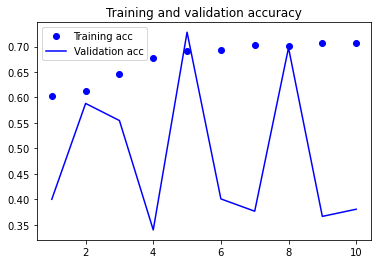

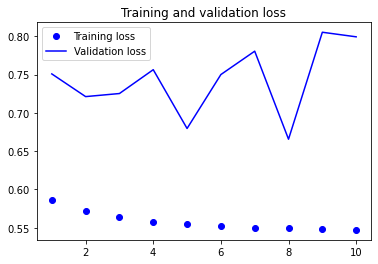

50/50 [==============================] - 1s 1ms/step - loss: 0.6048 - acc: 0.6288


[0.6048161387443542, 0.6287500262260437]

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
lines_t = lines1[:3200]
lines_ut = lines2[:3200]
test_t = test1[:800]
test_ut = test2[:800]


lines_ = []
test_lines_ = []

lines1_ = []
lines2_ = []
lines3_ = []
lines4_ = []
feature1 = []
feature2 = []
rating = []
sentiment = []
correlation = []
for line in lines_t:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)
    
    

for line in lines_ut:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)

for line in test_t:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
for line in test_ut:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
    
train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
input_train = np.asarray(feature1)
input_test = np.asarray(feature2)

input_train = input_train.reshape(-1,1,3)
input_test = input_test.reshape(-1,1,3)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

from keras.preprocessing import sequence

model = Sequential()
model.add(LSTM(32))
# 'binary_crossentropy
model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(input_test, test_labels)

In [13]:
from keras.layers import Input, Dense
from keras.models import Model
lines_t = lines3[:3200]
lines_ut = lines4[:3200]
test_t = test3[:800]
test_ut = test4[:800]


lines_ = []
test_lines_ = []

lines1_ = []
lines2_ = []
lines3_ = []
lines4_ = []
feature1 = []
feature2 = []
rating = []
sentiment = []
correlation = []
for line in lines_t:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)
    
    

for line in lines_ut:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)

for line in test_t:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
for line in test_ut:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
    
train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
input_train = np.asarray(feature1)
input_test = np.asarray(feature2)

input_train = input_train.reshape(-1,1,3)
input_test = input_test.reshape(-1,1,3)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

from keras.preprocessing import sequence

model = Sequential()
model.add(LSTM(32))
# 'binary_crossentropy
model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128)




model.evaluate(input_test, test_labels)

Epoch 1/10
50/50 [==============================] - 1s 1ms/step - loss: 0.7297 - acc: 0.5392
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6352 - acc: 0.6066
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6323 - acc: 0.6052
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6307 - acc: 0.6106
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6296 - acc: 0.6134
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6280 - acc: 0.6172
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6278 - acc: 0.6147
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6268 - acc: 0.6191
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.6268 - acc: 0.6209
Epoch 10/10
50/50 [==============================] - 1s 937us/step - loss: 0.6354 - acc: 0.6144


[0.6353550553321838, 0.6143749952316284]

Epoch 1/10
40/40 [==============================] - 2s 10ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 5.7844 - acc: 0.6250 - val_loss: 15.4249 - val_acc: 0.0000e+00
Epoch 8/10
40/40 [==============================] - 0s

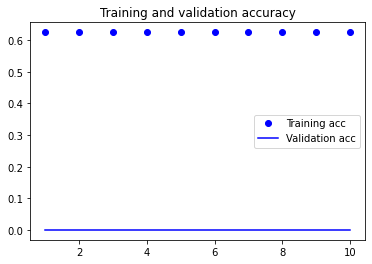

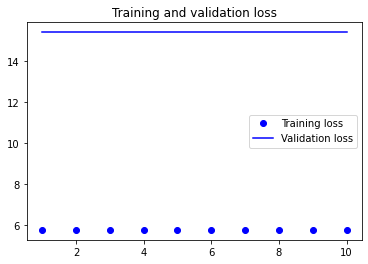

50/50 [==============================] - 1s 2ms/step - loss: 7.7125 - acc: 0.5000


[7.712474822998047, 0.5]

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
lines_t = lines5[:3200]
lines_ut = lines6[:3200]
test_t = test5[:800]
test_ut = test6[:800]


lines_ = []
test_lines_ = []

lines1_ = []
lines2_ = []
lines3_ = []
lines4_ = []
feature1 = []
feature2 = []
rating = []
sentiment = []
correlation = []
for line in lines_t:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)
    
    

for line in lines_ut:
    text = line.split(",")[3]
    lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature1.append(a)

for line in test_t:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
for line in test_ut:
    text = line.split(",")[3]
    test_lines_.append(text.strip())
    a = line.split(",")[:3]
    a = list(map(float, a))
    feature2.append(a)
    
    
train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
input_train = np.asarray(feature1)
input_test = np.asarray(feature2)

input_train = input_train.reshape(-1,1,3)
input_test = input_test.reshape(-1,1,3)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

from keras.preprocessing import sequence

model = Sequential()
model.add(LSTM(32))
# 'binary_crossentropy
model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(input_test, test_labels)